# Description:
In this notebook simulations of the galactic signal via the NuRadioMC software is investigated.

# Import modules:

In [2]:
from GalaxyFunctions import *
import scipy.fft as scfft

# Import data

Trying to simulate the following data entry:

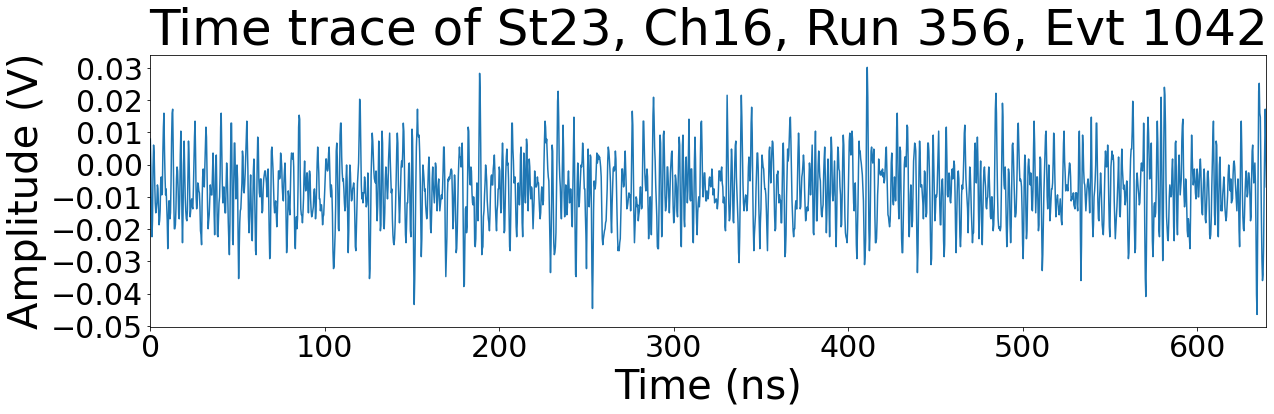

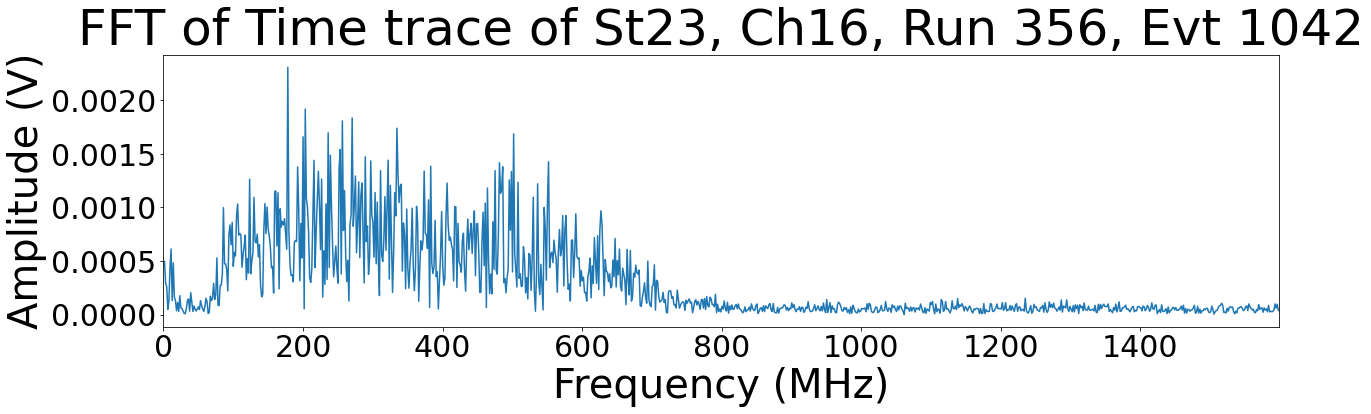

In [3]:
StNr,ChNr,Run,EvNr=23,16,356,1042
TimeTrace(StNr,ChNr,Run,EvNr,Amplitude="V")
TimeTraceFFT(StNr,ChNr,Run,EvNr,Amplitude="V",LogScale=False)

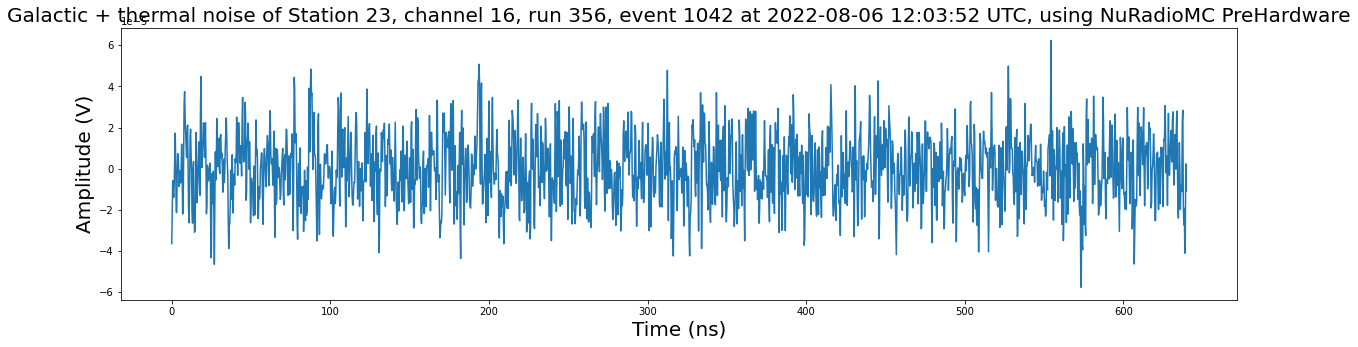

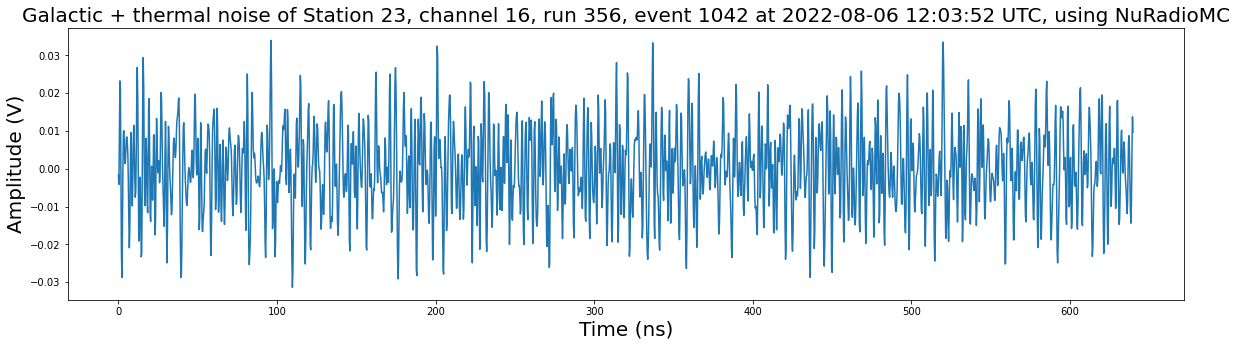

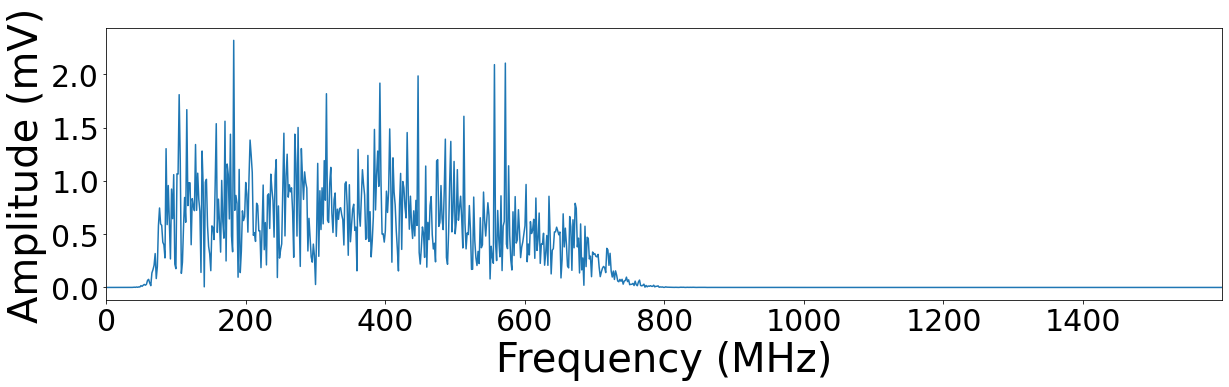

VRMS of simulated timetrace: 10.842452622324224 mV


In [3]:
StNr,ChNr,Run,EvNr=23,16,356,1042
SamplingTimes, SimTrace=SimNoiseTrace(StNr,ChNr,Run,EvNr,ThermalNoise=True,Plot=True)

GNFreq=scfft.fftfreq(len(SamplingTimes),(SamplingTimes[-1]-SamplingTimes[0])/len(SamplingTimes))
GNFreq=np.fft.fftshift(GNFreq)
GNFFT=scfft.fft(SimTrace)
GNFFT=np.fft.fftshift(GNFFT)

plt.figure(figsize=(20,5))
plt.ylabel("Amplitude (mV)",fontsize=40)#20)
plt.plot((GNFreq*(10**-6))[int(len(GNFreq)/2)+1:len(GNFreq)],1000*(2/len(SamplingTimes))*np.abs(GNFFT)[int(len(GNFFT)/2)+1:len(GNFFT)],'-')#25)
plt.xlim(0,np.max(GNFreq*(10**-6)))
plt.xlabel("Frequency (MHz)",fontsize=40)#20)
plt.xticks(fontsize=30)#15)
plt.yticks(fontsize=30)#15)
plt.show()

print("VRMS of simulated timetrace:", 1000*np.sqrt(np.mean([V**2 for V in SimTrace])),'mV' )

So the sum of thermal noise & galactic noise represents the data fairly well

Now galactic noise only:

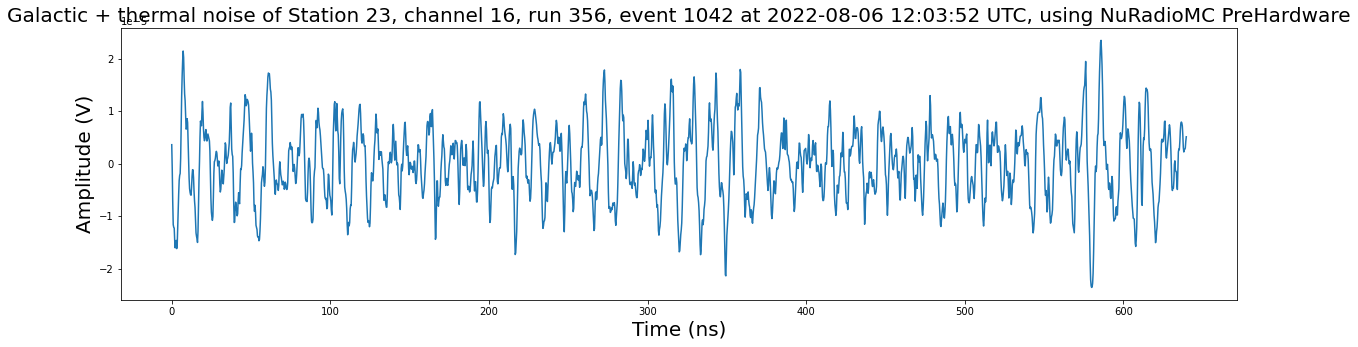

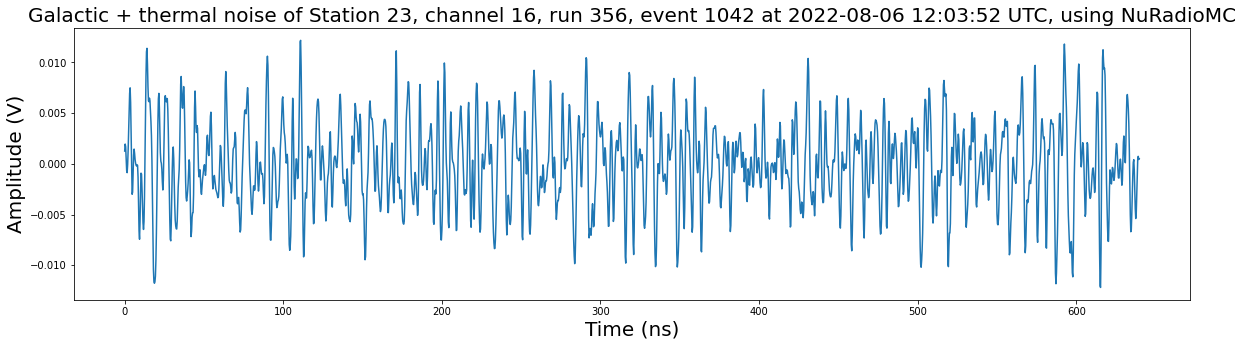

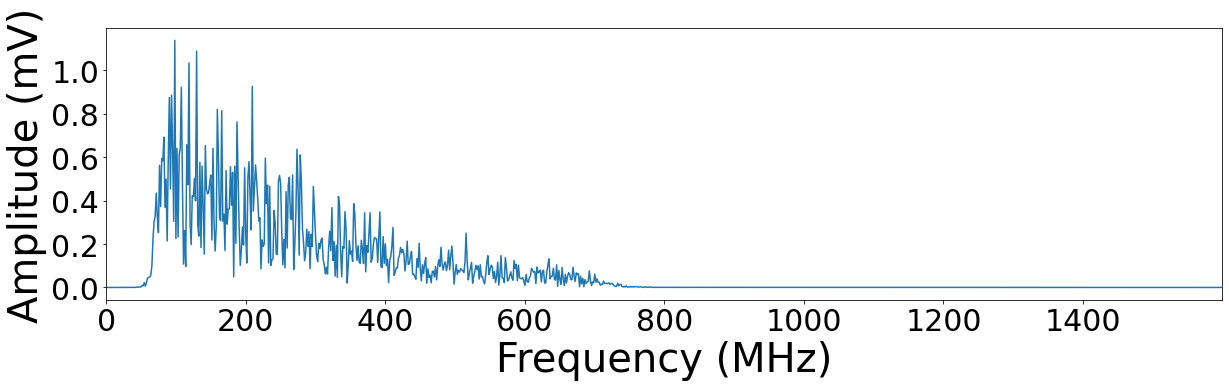

VRMS of simulated timetrace: 4.137026263114556 mV


In [4]:
StNr,ChNr,Run,EvNr=23,16,356,1042
SamplingTimes, SimTrace=SimNoiseTrace(StNr,ChNr,Run,EvNr,ThermalNoise=False,Plot=True)

GNFreq=scfft.fftfreq(len(SamplingTimes),(SamplingTimes[-1]-SamplingTimes[0])/len(SamplingTimes))
GNFreq=np.fft.fftshift(GNFreq)
GNFFT=scfft.fft(SimTrace)
GNFFT=np.fft.fftshift(GNFFT)

plt.figure(figsize=(20,5))
plt.ylabel("Amplitude (mV)",fontsize=40)#20)
plt.plot((GNFreq*(10**-6))[int(len(GNFreq)/2)+1:len(GNFreq)],1000*(2/len(SamplingTimes))*np.abs(GNFFT)[int(len(GNFFT)/2)+1:len(GNFFT)],'-')#25)
plt.xlim(0,np.max(GNFreq*(10**-6)))
plt.xlabel("Frequency (MHz)",fontsize=40)#20)
plt.xticks(fontsize=30)#15)
plt.yticks(fontsize=30)#15)
plt.show()

print("VRMS of simulated timetrace:", 1000*np.sqrt(np.mean([V**2 for V in SimTrace])),'mV' )

Comparing this with the reports from Lily's Ma thesis:
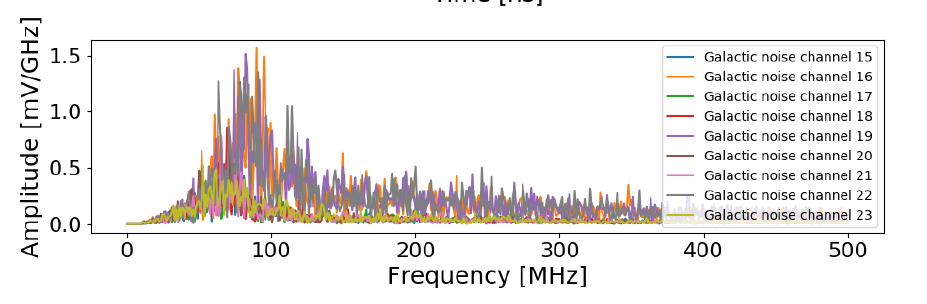

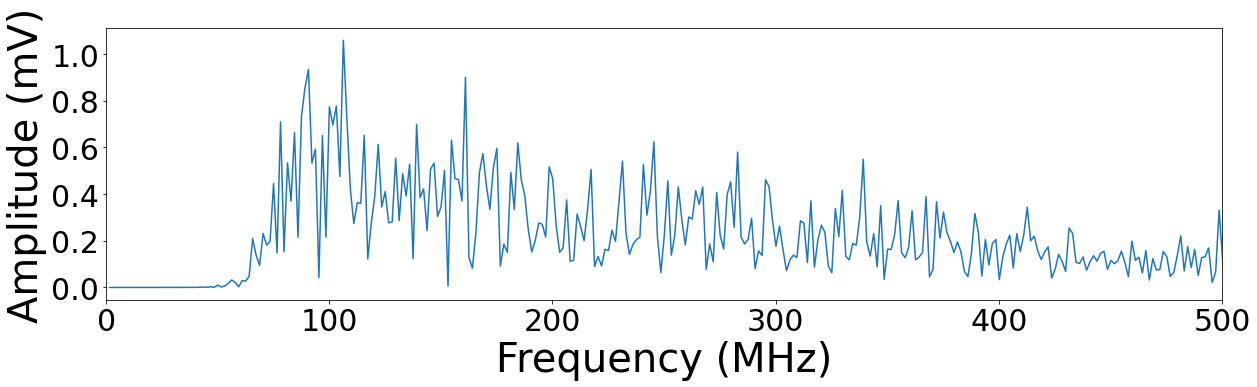

In [15]:
plt.figure(figsize=(20,5))
plt.ylabel("Amplitude (mV)",fontsize=40)#20)
plt.plot((GNFreq*(10**-6))[int(len(GNFreq)/2)+1:len(GNFreq)],1000*(2/len(SamplingTimes))*np.abs(GNFFT)[int(len(GNFFT)/2)+1:len(GNFFT)],'-')#25)
plt.xlim(0,500)
plt.xlabel("Frequency (MHz)",fontsize=40)#20)
plt.xticks(fontsize=30)#15)
plt.yticks(fontsize=30)#15)
plt.show()

There is some notable difference between these two results, which might be due to changes in detector desciption since the time Lily's plot was made. 

These simulation tools allow us to construct a simulated transit curve and subsequently compare it to the transit curve constructed from data, which is done in the DataSimComparison.ipynb notebook.